In [129]:
# importing important libraires
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    StackingClassifier,
)
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

<IPython.core.display.Javascript object>

In [72]:
# Importing the train and test data set
df = pd.read_csv(r"C:\Users\pramit\OneDrive\Desktop\Loan_default.csv")

<IPython.core.display.Javascript object>

In [73]:
# Checking the first few rows of the training data set
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.230,36,0.440,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.810,60,0.680,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.170,24,0.310,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.070,24,0.230,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.510,48,0.730,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


<IPython.core.display.Javascript object>

In [74]:
# Checking the last few rows of the training data set
df.tail()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.110,12,0.850,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.550,24,0.210,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.290,60,0.500,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.900,48,0.440,High School,Part-time,Single,Yes,Yes,Other,No,0
255346,ZTH91CGL0B,62,22418,18481,636,113,2,6.730,12,0.480,Bachelor's,Unemployed,Divorced,Yes,No,Education,Yes,0


<IPython.core.display.Javascript object>

In [75]:
# Checking the shape of the training data
df.shape

(255347, 18)

<IPython.core.display.Javascript object>

Observation: There are 255347 rows and 18 columns in the training data set

In [76]:
# checking the data type in the training dtata
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

<IPython.core.display.Javascript object>

In [77]:
cols = df.select_dtypes(["object"])
cols.columns

Index(['LoanID', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
       'HasDependents', 'LoanPurpose', 'HasCoSigner'],
      dtype='object')

<IPython.core.display.Javascript object>

In [78]:
# changing object datatype to category
for i in cols.columns:
    df[i] = df[i].astype("category")

<IPython.core.display.Javascript object>

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   LoanID          255347 non-null  category
 1   Age             255347 non-null  int64   
 2   Income          255347 non-null  int64   
 3   LoanAmount      255347 non-null  int64   
 4   CreditScore     255347 non-null  int64   
 5   MonthsEmployed  255347 non-null  int64   
 6   NumCreditLines  255347 non-null  int64   
 7   InterestRate    255347 non-null  float64 
 8   LoanTerm        255347 non-null  int64   
 9   DTIRatio        255347 non-null  float64 
 10  Education       255347 non-null  category
 11  EmploymentType  255347 non-null  category
 12  MaritalStatus   255347 non-null  category
 13  HasMortgage     255347 non-null  category
 14  HasDependents   255347 non-null  category
 15  LoanPurpose     255347 non-null  category
 16  HasCoSigner     255347 non-null  categ

<IPython.core.display.Javascript object>

All datatypes of object type have been coverted to category. The memory usage has also decreased from 35.1MB to 32.2MB

In [80]:
# Checking of missing values
df.isna().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

<IPython.core.display.Javascript object>

There are no missing values in the dataset

In [81]:
# dropping Loan id as it is just for reference
df.drop(["LoanID"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [82]:
# summary of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,255347.000,43.498,14.990,18.000,31.000,43.000,56.000,69.000
Income,255347.000,82499.305,38963.014,15000.000,48825.500,82466.000,116219.000,149999.000
LoanAmount,255347.000,127578.866,70840.706,5000.000,66156.000,127556.000,188985.000,249999.000
CreditScore,255347.000,574.264,158.904,300.000,437.000,574.000,712.000,849.000
MonthsEmployed,255347.000,59.542,34.643,0.000,30.000,60.000,90.000,119.000
NumCreditLines,255347.000,2.501,1.117,1.000,2.000,2.000,3.000,4.000
InterestRate,255347.000,13.493,6.636,2.000,7.770,13.460,19.250,25.000
LoanTerm,255347.000,36.026,16.969,12.000,24.000,36.000,48.000,60.000
DTIRatio,255347.000,0.500,0.231,0.100,0.300,0.500,0.700,0.900
Default,255347.000,0.116,0.320,0.000,0.000,0.000,0.000,1.000


<IPython.core.display.Javascript object>

In [83]:
# summary of categorical variable
df.describe(include=["category"]).T

,count,unique,top,freq
Education,255347,4,Bachelor's,64366
EmploymentType,255347,4,Part-time,64161
MaritalStatus,255347,3,Married,85302
HasMortgage,255347,2,Yes,127677
HasDependents,255347,2,Yes,127742
LoanPurpose,255347,5,Business,51298
HasCoSigner,255347,2,Yes,127701


<IPython.core.display.Javascript object>

In [84]:
data = df.copy()

<IPython.core.display.Javascript object>

In [85]:
# function to create labeled barplots


def labeled_barplot(data, feature, feature_2, order, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    feature_2: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    ax = sns.countplot(
        data=data, x=feature, palette="viridis", order=order, hue=feature_2,
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=9,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [86]:
# Defining the function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [87]:
# function to create labeled barplots for 1 variable


def labeled_barplot1(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot


<IPython.core.display.Javascript object>

In [88]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5), cmap="viridis")
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

In [89]:
### function to plot distributions with respect to target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot( 
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

In [90]:
# group data by education and count the numbers of each category for defaulted or not defaulted
df.groupby("Education")["Default"].value_counts()

Education    Default
Bachelor's   0          56577
             1           7789
High School  0          55673
             1           8230
Master's     0          56633
             1           6908
PhD          0          56811
             1           6726
Name: Default, dtype: int64

<IPython.core.display.Javascript object>

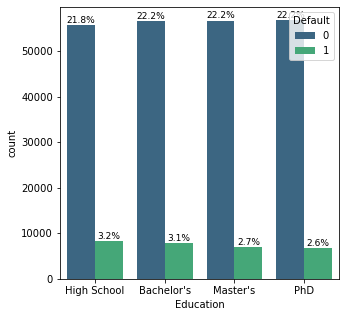

<IPython.core.display.Javascript object>

In [91]:
# create a plot of the data above, but additionally with the percent of each group within the total number of cases
labeled_barplot(
    df,
    "Education",
    "Default",
    order=["High School", "Bachelor's", "Master's", "PhD"],
    perc=True,
)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   Age             255347 non-null  int64   
 1   Income          255347 non-null  int64   
 2   LoanAmount      255347 non-null  int64   
 3   CreditScore     255347 non-null  int64   
 4   MonthsEmployed  255347 non-null  int64   
 5   NumCreditLines  255347 non-null  int64   
 6   InterestRate    255347 non-null  float64 
 7   LoanTerm        255347 non-null  int64   
 8   DTIRatio        255347 non-null  float64 
 9   Education       255347 non-null  category
 10  EmploymentType  255347 non-null  category
 11  MaritalStatus   255347 non-null  category
 12  HasMortgage     255347 non-null  category
 13  HasDependents   255347 non-null  category
 14  LoanPurpose     255347 non-null  category
 15  HasCoSigner     255347 non-null  category
 16  Default         255347 non-null  int64

<IPython.core.display.Javascript object>

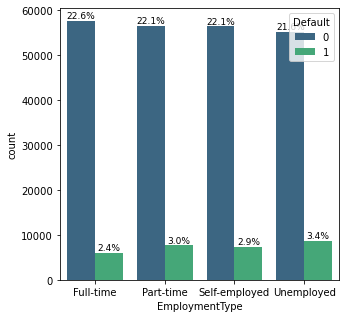

<IPython.core.display.Javascript object>

In [93]:
# barplot to see the employment type and default percentage
labeled_barplot(df, "EmploymentType", "Default", order=None, perc=True)

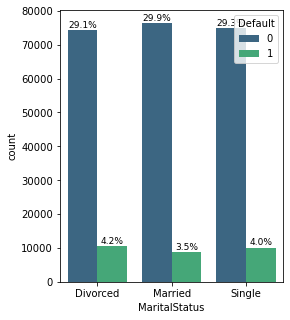

<IPython.core.display.Javascript object>

In [94]:
# barplot to see the MaritalStatus and default percentage
labeled_barplot(df, "MaritalStatus", "Default", order=None, perc=True)

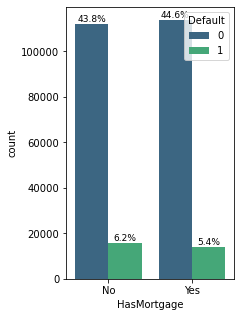

<IPython.core.display.Javascript object>

In [95]:
# barplot to see the HasMortgage and default percentage
labeled_barplot(df, "HasMortgage", "Default", order=None, perc=True)

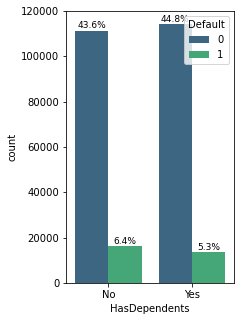

<IPython.core.display.Javascript object>

In [96]:
# barplot to see the HasDependents and default percentage
labeled_barplot(df, "HasDependents", "Default", order=None, perc=True)

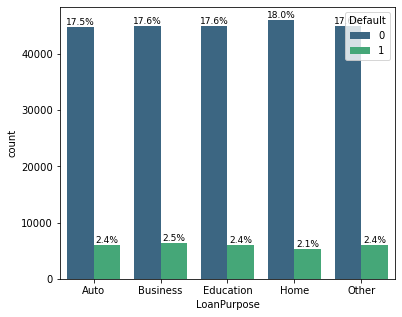

<IPython.core.display.Javascript object>

In [97]:
# barplot to see the LoanPurpose and default percentage
labeled_barplot(df, "LoanPurpose", "Default", order=None, perc=True)

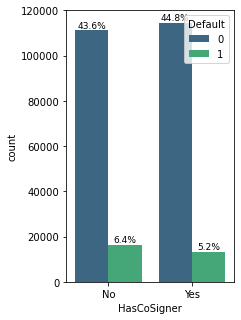

<IPython.core.display.Javascript object>

In [98]:
# barplot to see the HasCoSigner and default percentage
labeled_barplot(df, "HasCoSigner", "Default", order=None, perc=True)

Default           0      1     All
LoanPurpose                       
All          225694  29653  255347
Business      44975   6323   51298
Auto          44803   6041   50844
Education     44967   6038   51005
Other         44912   6002   50914
Home          46037   5249   51286
------------------------------------------------------------------------------------------------------------------------


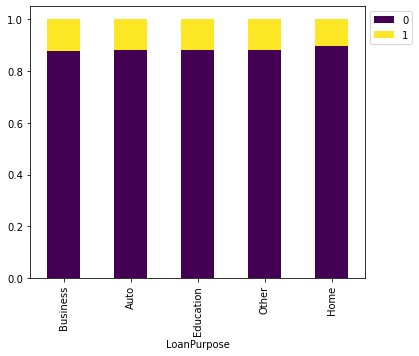

<IPython.core.display.Javascript object>

In [99]:
# loan purpose and default status
stacked_barplot(df, "LoanPurpose", "Default")

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   Age             255347 non-null  int64   
 1   Income          255347 non-null  int64   
 2   LoanAmount      255347 non-null  int64   
 3   CreditScore     255347 non-null  int64   
 4   MonthsEmployed  255347 non-null  int64   
 5   NumCreditLines  255347 non-null  int64   
 6   InterestRate    255347 non-null  float64 
 7   LoanTerm        255347 non-null  int64   
 8   DTIRatio        255347 non-null  float64 
 9   Education       255347 non-null  category
 10  EmploymentType  255347 non-null  category
 11  MaritalStatus   255347 non-null  category
 12  HasMortgage     255347 non-null  category
 13  HasDependents   255347 non-null  category
 14  LoanPurpose     255347 non-null  category
 15  HasCoSigner     255347 non-null  category
 16  Default         255347 non-null  int64

<IPython.core.display.Javascript object>

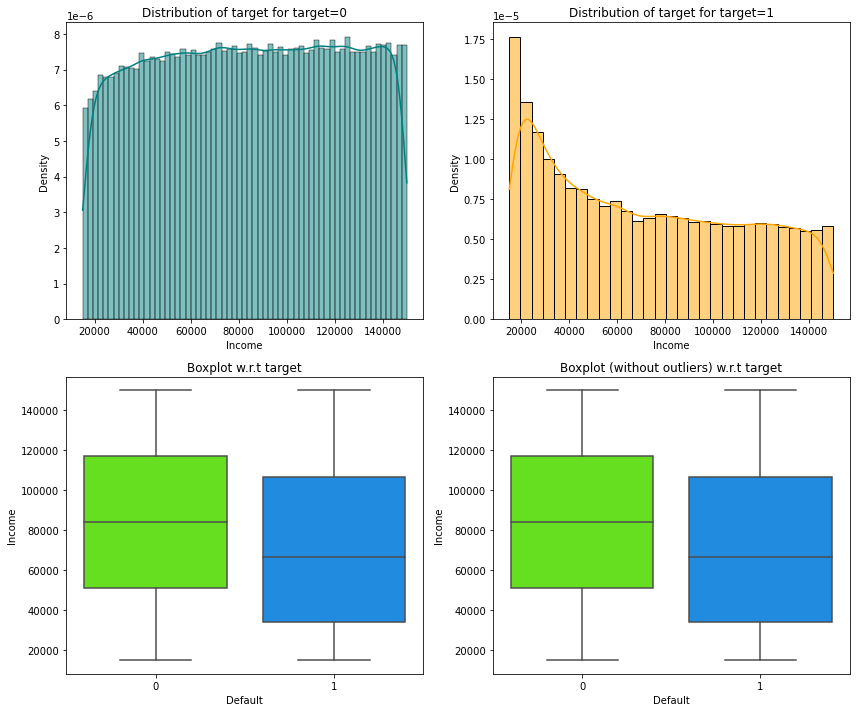

<IPython.core.display.Javascript object>

In [101]:
# Checking the distribution of income with respect to target
distribution_plot_wrt_target(df, "Income", "Default")

In [102]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,255347.000,43.498,14.990,18.000,31.000,43.000,56.000,69.000
Income,255347.000,82499.305,38963.014,15000.000,48825.500,82466.000,116219.000,149999.000
LoanAmount,255347.000,127578.866,70840.706,5000.000,66156.000,127556.000,188985.000,249999.000
CreditScore,255347.000,574.264,158.904,300.000,437.000,574.000,712.000,849.000
MonthsEmployed,255347.000,59.542,34.643,0.000,30.000,60.000,90.000,119.000
NumCreditLines,255347.000,2.501,1.117,1.000,2.000,2.000,3.000,4.000
InterestRate,255347.000,13.493,6.636,2.000,7.770,13.460,19.250,25.000
LoanTerm,255347.000,36.026,16.969,12.000,24.000,36.000,48.000,60.000
DTIRatio,255347.000,0.500,0.231,0.100,0.300,0.500,0.700,0.900
Default,255347.000,0.116,0.320,0.000,0.000,0.000,0.000,1.000


<IPython.core.display.Javascript object>

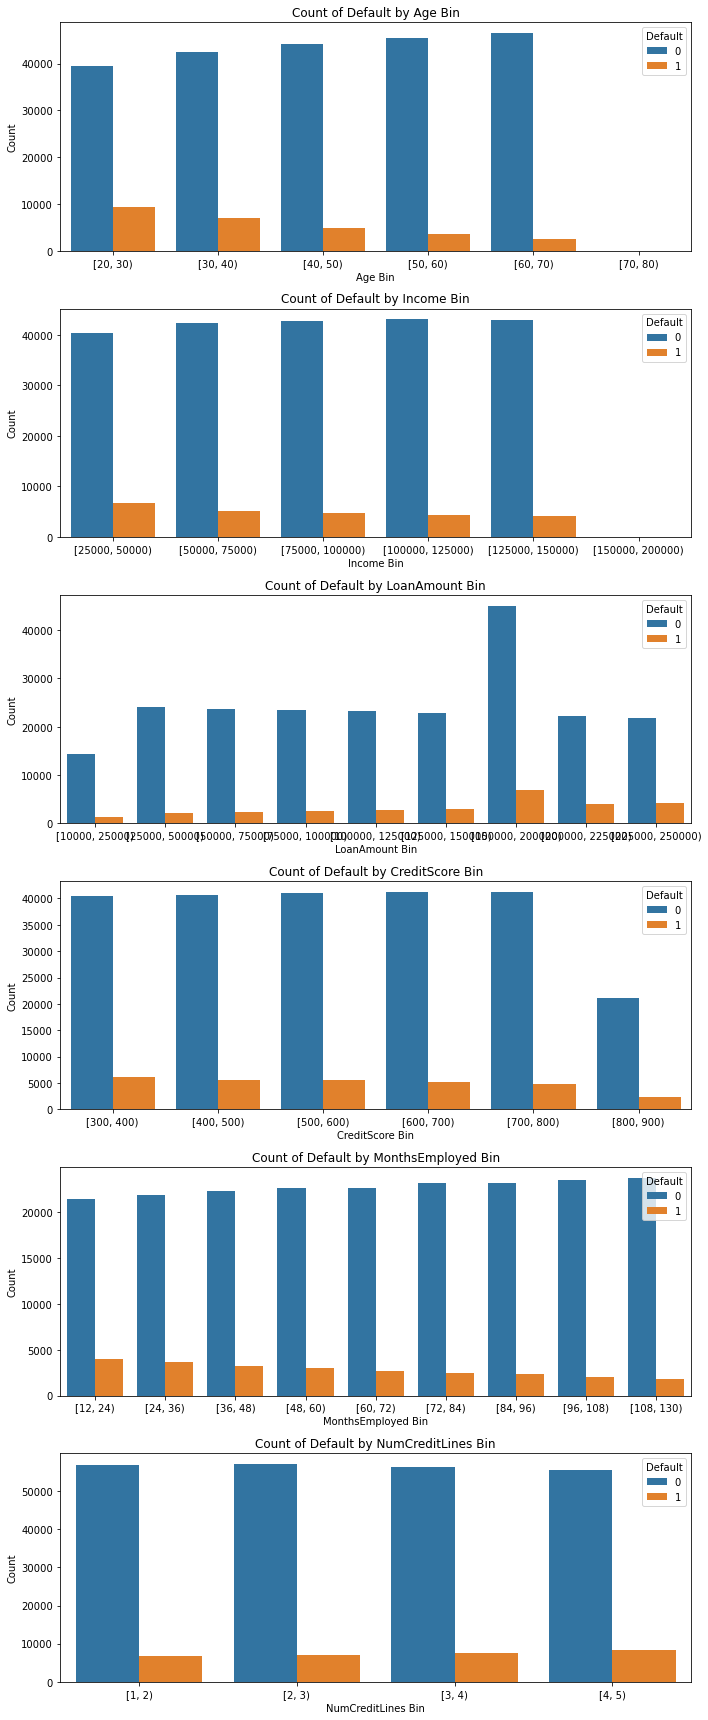

<IPython.core.display.Javascript object>

In [124]:


def plot_trend_by_bins(data, target_variable, variables_to_analyze, bins):
    """
    Plot the trend of the target variable with respect to each selected variable using bar plots.

    Parameters:
    - data: DataFrame containing the data.
    - target_variable: Name of the target variable to analyze.
    - variables_to_analyze: List of variable names to analyze.
    - bins: List of bin edges for binning the variables.

    Returns:
    - None (plots the bar plots).
    """
    # Create a new DataFrame for binned data without modifying the main DataFrame
    df_binned = data.copy()

    # Create subplots
    fig, axes = plt.subplots(nrows=len(variables_to_analyze), figsize=(10, 4 * len(variables_to_analyze)))

    for i, variable in enumerate(variables_to_analyze):
        # Create a new column for the binned variable
        df_binned[variable + '_bin'] = pd.cut(df_binned[variable], bins=bins[i], right=False)

        # Plot the bar plot using Seaborn
        sns.countplot(x=variable + '_bin', hue=target_variable, data=df_binned, ax=axes[i])
        axes[i].set_title(f'Count of {target_variable} by {variable} Bin')
        axes[i].set_xlabel(f'{variable} Bin')
        axes[i].set_ylabel('Count')

    plt.tight_layout()
    plt.show()



# Select only numerical variables
numerical_df = df.select_dtypes(include=['number'])

# Define bins for variables
age_bins = [20, 30, 40, 50, 60, 70, 80]
income_bins = [25000, 50000, 75000, 100000, 125000, 150000, 200000]
Loanamount_bin = [10000, 25000, 50000, 75000, 100000, 125000, 150000, 200000, 225000, 250000]
creditscore_bin = [300, 400, 500, 600, 700, 800, 900]
MonthsEmployed_bin = [12, 24, 36, 48, 60, 72, 84, 96, 108, 130]
NumCreditLines_bin = [1, 2, 3, 4, 5]
# Specify the target variable and variables to analyze
target_variable = "Default"
variables_to_analyze = ['Age', 'Income', 'LoanAmount','CreditScore', 'MonthsEmployed', 'NumCreditLines']

# Plot the trend for each variable using bar plots
plot_trend_by_bins(numerical_df, target_variable, variables_to_analyze, bins=[age_bins, income_bins, Loanamount_bin,creditscore_bin,MonthsEmployed_bin, NumCreditLines_bin])


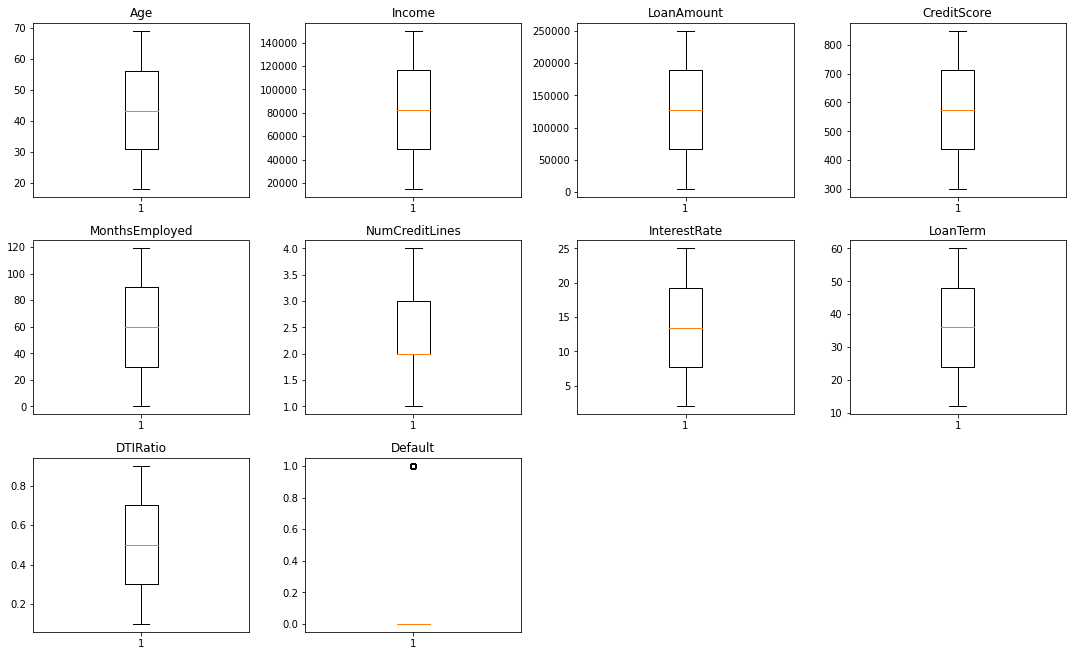

<IPython.core.display.Javascript object>

In [125]:
# Checking for outliers in the dataset using boxplot

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

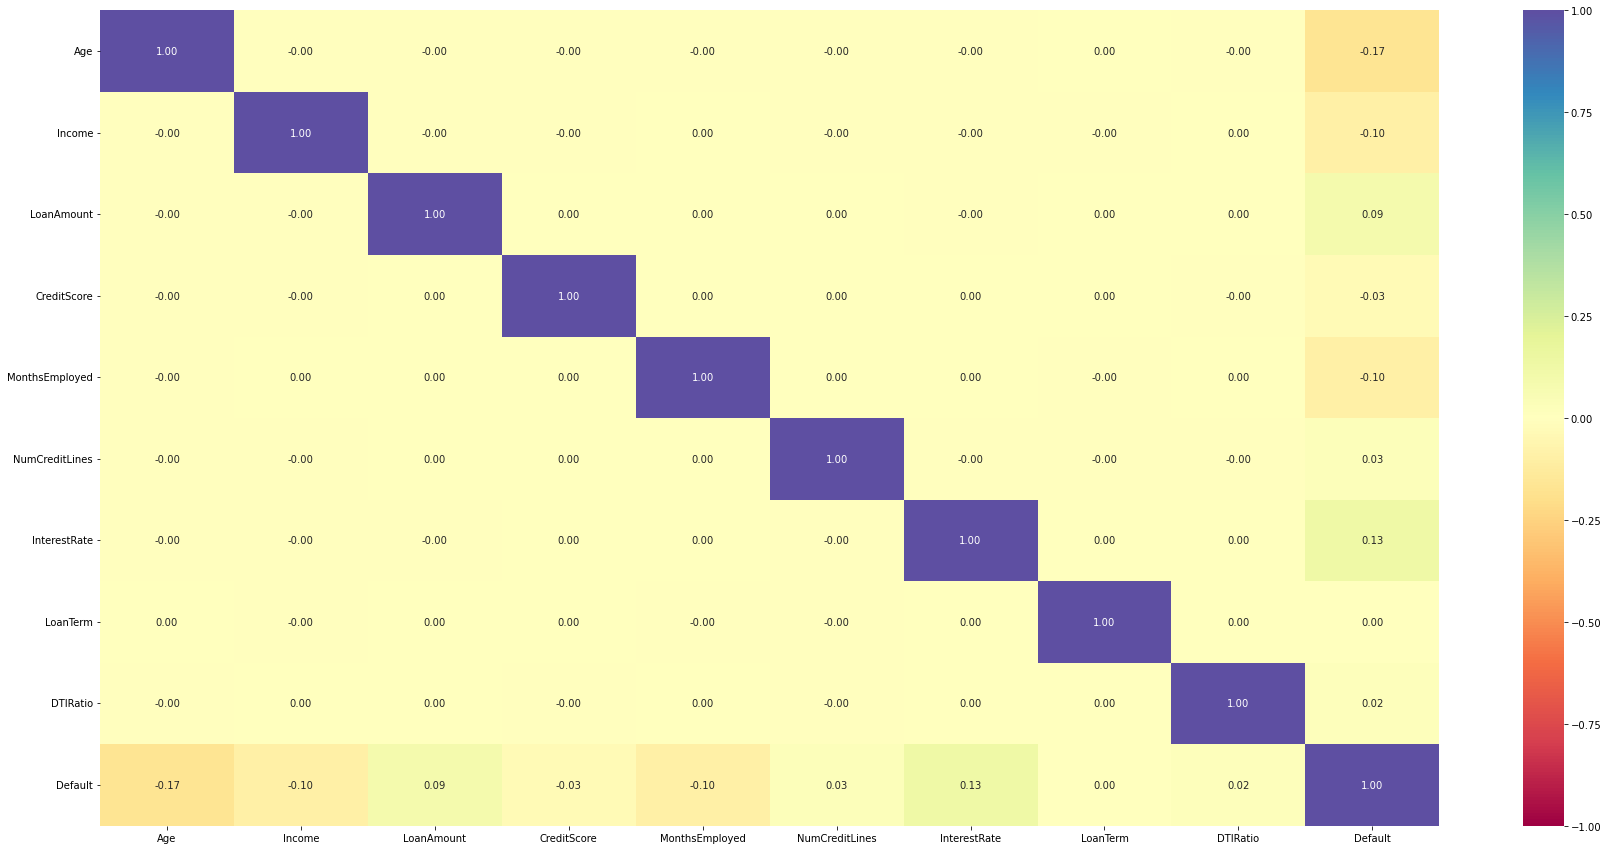

<IPython.core.display.Javascript object>

In [126]:
# plotting a correlation heat map
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(30, 15))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

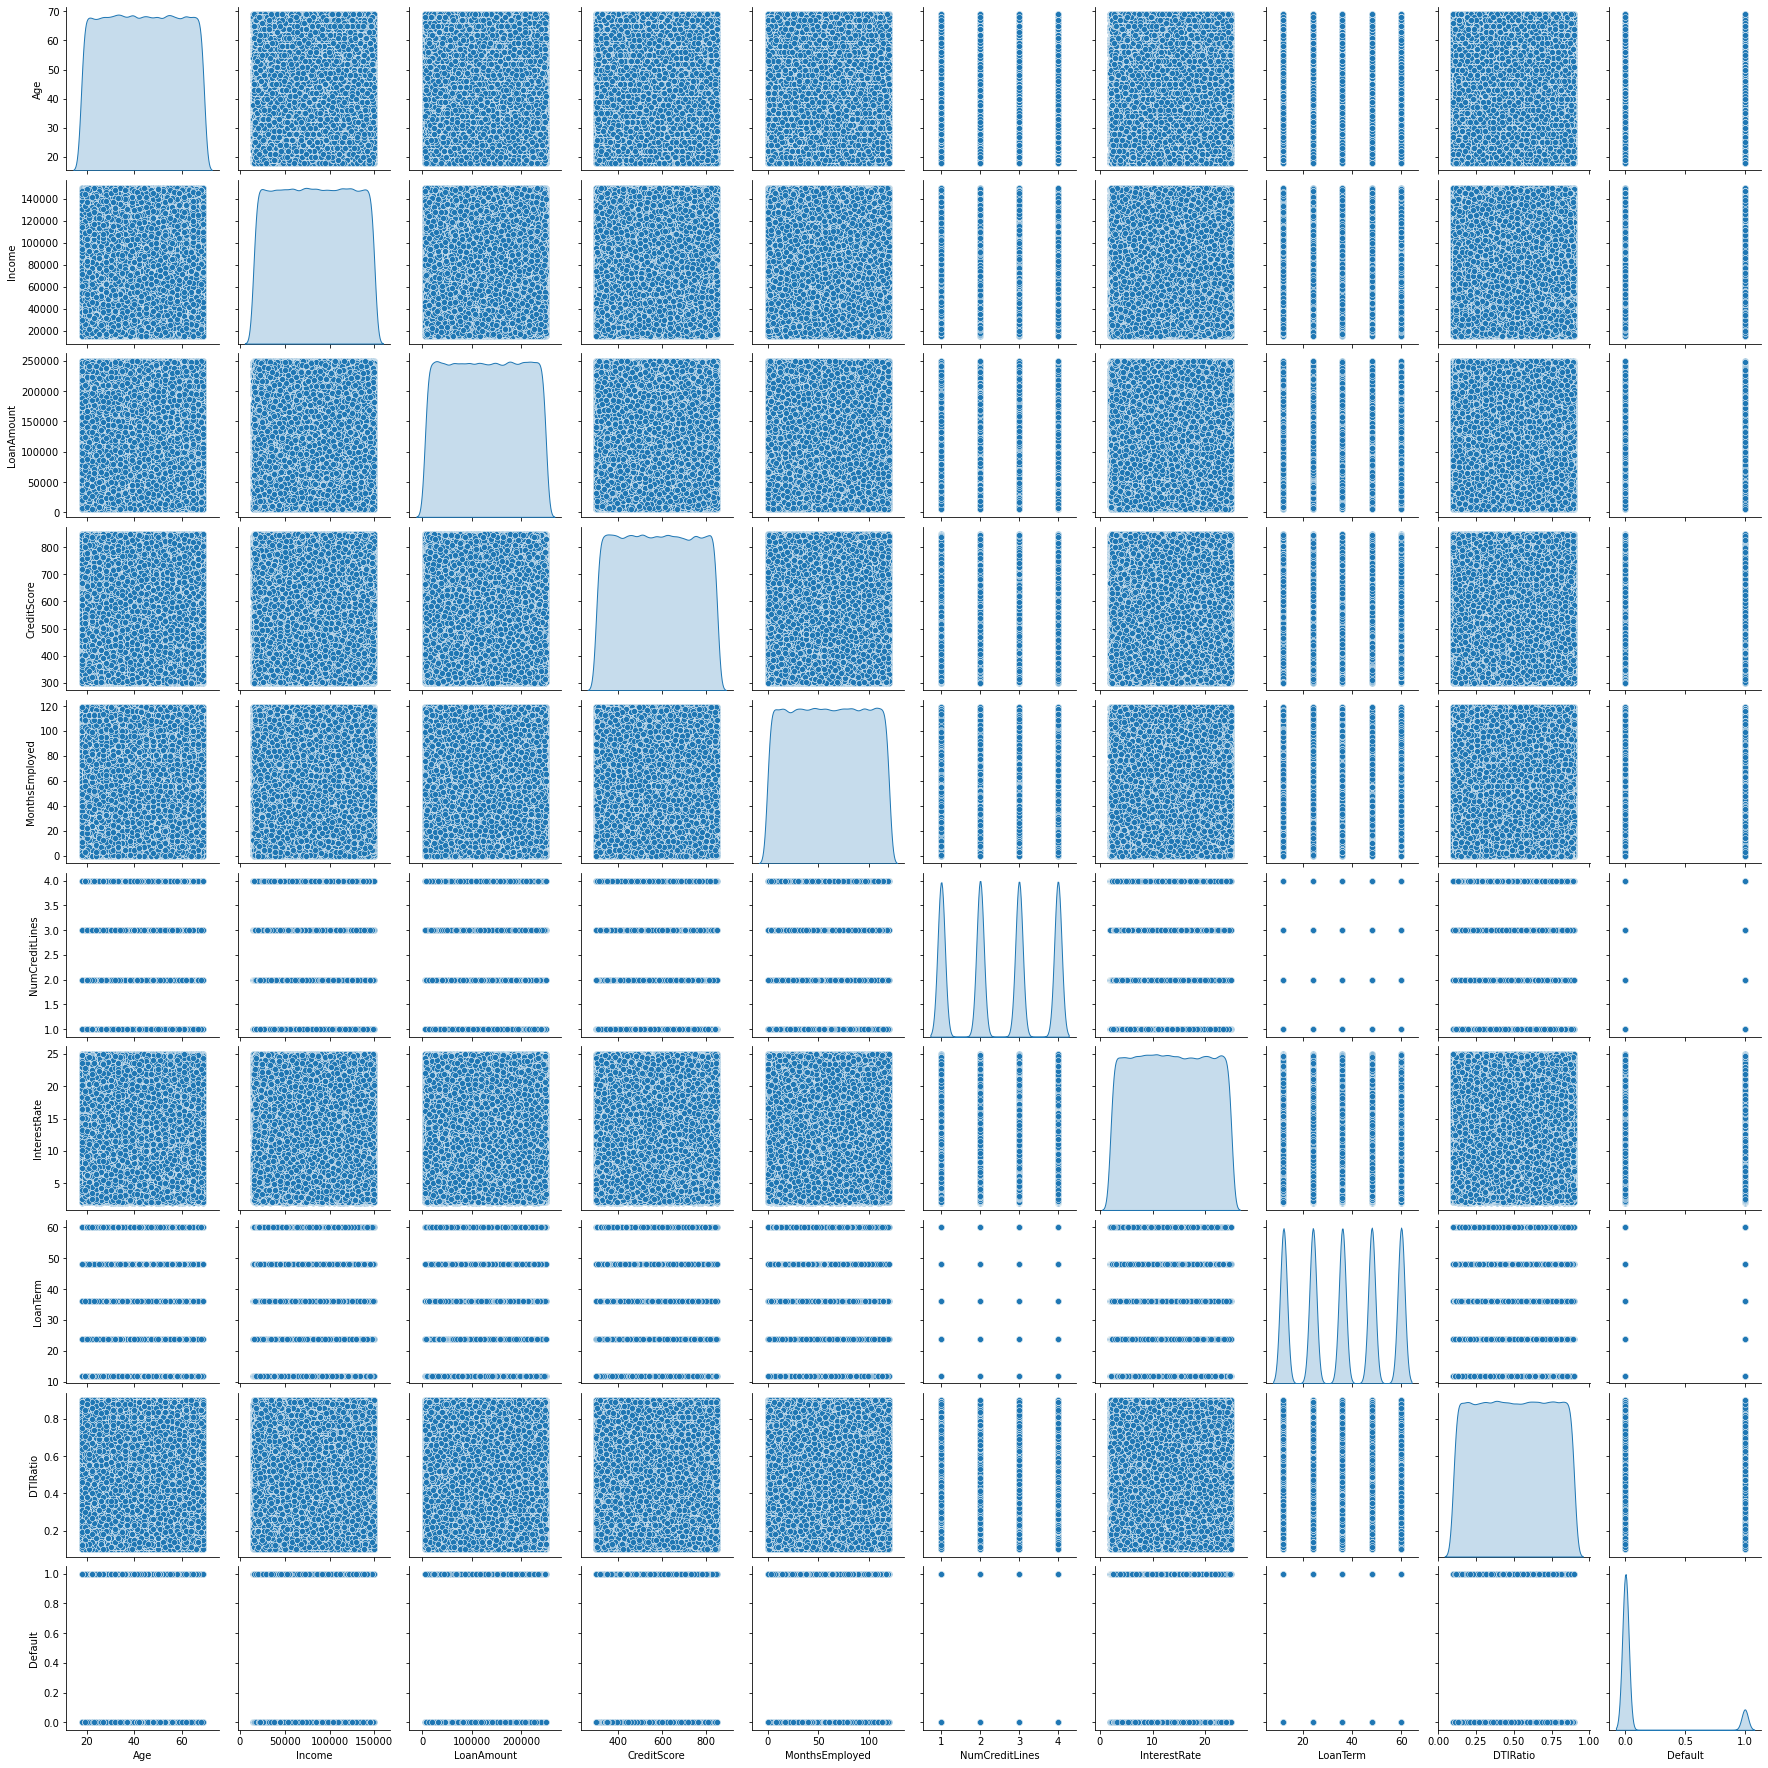

<IPython.core.display.Javascript object>

In [128]:
# pairplot
sns.pairplot(df, diag_kind="kde")
plt.show()

In [130]:
# Separating features and the target column
X = df.drop("Default", axis=1)
y = df["Default"]

<IPython.core.display.Javascript object>

In [131]:
# creating dummies
X = pd.get_dummies(X, drop_first=True)

<IPython.core.display.Javascript object>

In [132]:
X.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education_High School,Education_Master's,Education_PhD,EmploymentType_Part-time,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes
0,56,85994,50587,520,80,4,15.230,36,0.440,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1
1,69,50432,124440,458,15,1,4.810,60,0.680,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1
2,46,84208,129188,451,26,3,21.170,24,0.310,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0
3,32,31713,44799,743,0,3,7.070,24,0.230,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,60,20437,9139,633,8,4,6.510,48,0.730,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


<IPython.core.display.Javascript object>

In [133]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1, stratify=y
)

<IPython.core.display.Javascript object>

In [134]:
X_train.shape, X_test.shape

((178742, 24), (76605, 24))

<IPython.core.display.Javascript object>

In [135]:
y.value_counts(1)

0   0.884
1   0.116
Name: Default, dtype: float64

<IPython.core.display.Javascript object>

In [146]:
# Oversampling the data using SMOTE technique
# Checking the count of the target variables before oversampling
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


# Checking the count of the target variables after oversampling
print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))

# Checking the shape of the predictor and target variables after oversampling
print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, counts of label '1': 20757
Before OverSampling, counts of label '0': 157985 

After OverSampling, counts of label '1': 157985
After OverSampling, counts of label '0': 157985 

After OverSampling, the shape of train_X: (315970, 24)
After OverSampling, the shape of train_y: (315970,) 



<IPython.core.display.Javascript object>

In [150]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf


<IPython.core.display.Javascript object>

In [151]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

Training performance:
    Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000
Testing performance:
    Accuracy  Recall  Precision    F1
0     0.762   0.292      0.179 0.222


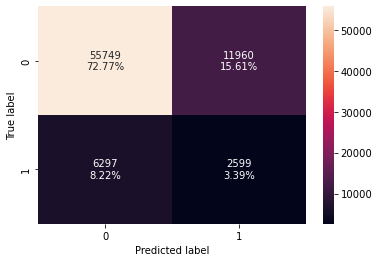

<IPython.core.display.Javascript object>

In [152]:
## Decision Tree
# Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train_over, y_train_over)

# Calculating different metrics
d_tree_model_train_perf = model_performance_classification_sklearn(
    d_tree, X_train_over, y_train_over
)
print("Training performance:\n", d_tree_model_train_perf)
d_tree_model_test_perf = model_performance_classification_sklearn(
    d_tree, X_test, y_test
)
print("Testing performance:\n", d_tree_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(d_tree, X_test, y_test)

In [154]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 12),
    "min_samples_leaf": [1, 2, 3, 4],
    "max_leaf_nodes": [2, 4, 6],
    "min_impurity_decrease": [0.0001, 0.001, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train_over, y_train_over)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, random_state=1)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy  Recall  Precision    F1
0     0.637   0.768      0.609 0.679
Testing performance:
    Accuracy  Recall  Precision    F1
0     0.514   0.554      0.129 0.209


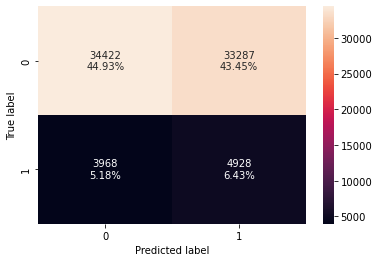

<IPython.core.display.Javascript object>

In [155]:
# Calculating different metrics
dtree_estimator_model_train_perf = model_performance_classification_sklearn(
    dtree_estimator, X_train_over, y_train_over
)
print("Training performance:\n", dtree_estimator_model_train_perf)
dtree_estimator_model_test_perf = model_performance_classification_sklearn(
    dtree_estimator, X_test, y_test
)
print("Testing performance:\n", dtree_estimator_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

Training performance:
    Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000
Testing performance:
    Accuracy  Recall  Precision    F1
0     0.862   0.105      0.263 0.150


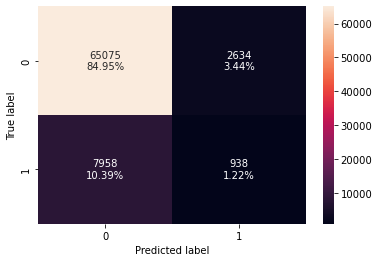

<IPython.core.display.Javascript object>

In [156]:
# random forest
# Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train_over, y_train_over)

# Calculating different metrics
rf_estimator_model_train_perf = model_performance_classification_sklearn(
    rf_estimator, X_train_over, y_train_over
)
print("Training performance:\n", rf_estimator_model_train_perf)
rf_estimator_model_test_perf = model_performance_classification_sklearn(
    rf_estimator, X_test, y_test
)
print("Testing performance:\n", rf_estimator_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

In [157]:
## random forest hyper parameter tuned
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "n_estimators": np.arange(10, 40, 10),
    "min_samples_leaf": np.arange(5, 10),
    "min_samples_split": [3, 5, 7],
    "max_features": ["sqrt", "log2"],
    "max_samples": np.arange(0.3, 0.7, 0.1),
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring="f1", cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train_over, y_train_over)

RandomForestClassifier(max_samples=0.6000000000000001, min_samples_leaf=5,
                       min_samples_split=3, n_estimators=30, oob_score=True,
                       random_state=1)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy  Recall  Precision    F1
0     0.927   0.883      0.968 0.924
Testing performance:
    Accuracy  Recall  Precision    F1
0     0.855   0.132      0.258 0.174


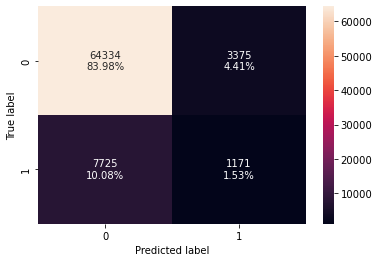

<IPython.core.display.Javascript object>

In [158]:
# Calculating different metrics
rf_tuned_model_train_perf = model_performance_classification_sklearn(
    rf_tuned, X_train_over, y_train_over
)
print("Training performance:\n", rf_tuned_model_train_perf)
rf_tuned_model_test_perf = model_performance_classification_sklearn(
    rf_tuned, X_test, y_test
)
print("Testing performance:\n", rf_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

Training performance:
    Accuracy  Recall  Precision    F1
0     0.992   0.985      0.999 0.992
Testing performance:
    Accuracy  Recall  Precision    F1
0     0.850   0.155      0.256 0.193


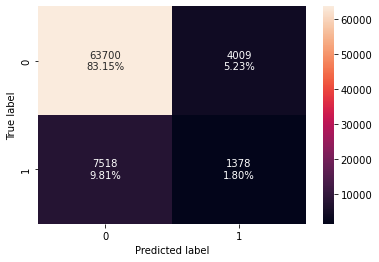

<IPython.core.display.Javascript object>

Training performance:
    Accuracy  Recall  Precision    F1
0     0.520   0.045      0.901 0.086
Testing performance:
    Accuracy  Recall  Precision    F1
0     0.886   0.052      0.579 0.096


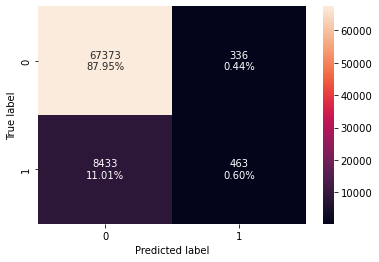

<IPython.core.display.Javascript object>

In [161]:
##ada boost
# Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train, y_train)

# Calculating different metrics
ab_classifier_model_train_perf = model_performance_classification_sklearn(
    ab_classifier, X_train_over, y_train_over
)
print("Training performance:\n", ab_classifier_model_train_perf)
ab_classifier_model_test_perf = model_performance_classification_sklearn(
    ab_classifier, X_test, y_test
)
print("Testing performance:\n", ab_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(ab_classifier, X_test, y_test)

In [162]:
# adaboost hyper parameter tuned
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1),
        DecisionTreeClassifier(max_depth=2),
    ],
    "n_estimators": np.arange(20, 120, 40),
    "learning_rate": np.arange(0.2, 2, 0.6),
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer, cv=3)
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train_over, y_train_over)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.8, n_estimators=100, random_state=1)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy  Recall  Precision    F1
0     0.906   0.870      0.938 0.903
Testing performance:
    Accuracy  Recall  Precision    F1
0     0.855   0.195      0.303 0.237


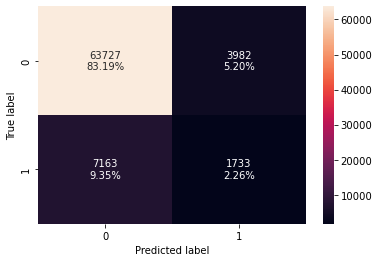

<IPython.core.display.Javascript object>

In [163]:
# Calculating different metrics
abc_tuned_model_train_perf = model_performance_classification_sklearn(
    abc_tuned, X_train_over, y_train_over
)
print("Training performance:\n", abc_tuned_model_train_perf)
abc_tuned_model_test_perf = model_performance_classification_sklearn(
    abc_tuned, X_test, y_test
)
print("Testing performance:\n", abc_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

Training performance:
    Accuracy  Recall  Precision    F1
0     0.906   0.868      0.938 0.902
Testing performance:
    Accuracy  Recall  Precision    F1
0     0.852   0.158      0.266 0.198


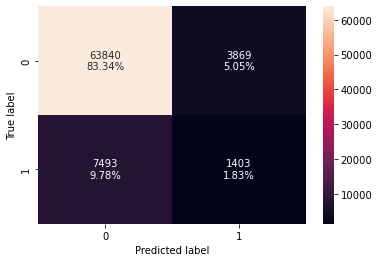

<IPython.core.display.Javascript object>

In [164]:
# gradient boost
# Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train_over, y_train_over)

# Calculating different metrics
gb_classifier_model_train_perf = model_performance_classification_sklearn(
    gb_classifier, X_train_over, y_train_over
)
print("Training performance:\n", gb_classifier_model_train_perf)
gb_classifier_model_test_perf = model_performance_classification_sklearn(
    gb_classifier, X_test, y_test
)
print("Testing performance:\n", gb_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(gb_classifier, X_test, y_test)

In [165]:
# gradient boost hyperparameter tuned
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100, 175, 250],
    "subsample": [0.8, 1],
    "max_features": [0.8, 0.9, 1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer, cv=3)
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=250, random_state=1,
                           subsample=1)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy  Recall  Precision    F1
0     0.910   0.871      0.945 0.906
Testing performance:
    Accuracy  Recall  Precision    F1
0     0.858   0.170      0.303 0.218


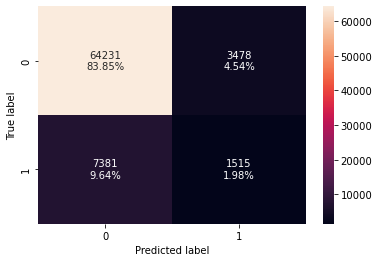

<IPython.core.display.Javascript object>

In [166]:
# Calculating different metrics
gbc_tuned_model_train_perf = model_performance_classification_sklearn(
    gbc_tuned, X_train_over, y_train_over
)
print("Training performance:\n", gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf = model_performance_classification_sklearn(
    gbc_tuned, X_test, y_test
)
print("Testing performance:\n", gbc_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

Training performance:
    Accuracy  Recall  Precision    F1
0     0.928   0.884      0.969 0.925
Testing performance:
    Accuracy  Recall  Precision    F1
0     0.869   0.144      0.347 0.203


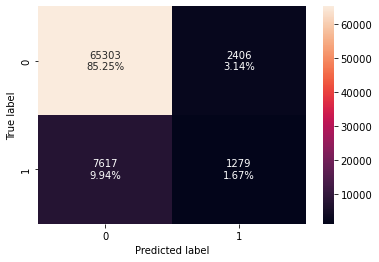

<IPython.core.display.Javascript object>

In [167]:
##XGB
# Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric="logloss")
xgb_classifier.fit(X_train_over, y_train_over)

# Calculating different metrics
xgb_classifier_model_train_perf = model_performance_classification_sklearn(
    xgb_classifier, X_train_over, y_train_over
)
print("Training performance:\n", xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf = model_performance_classification_sklearn(
    xgb_classifier, X_test, y_test
)
print("Testing performance:\n", xgb_classifier_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier, X_test, y_test)

In [168]:
# XGB HYPERPARAMETER
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10, 30, 50],
    "scale_pos_weight": [1, 2, 5],
    "subsample": [0.7, 0.9, 1],
    "learning_rate": [0.05, 0.1, 0.2],
    "colsample_bytree": [0.7, 0.9, 1],
    "colsample_bylevel": [0.5, 0.7, 1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer, cv=3)
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train_over, y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=1, colsample_bynode=None, colsample_bytree=0.9,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy  Recall  Precision    F1
0     0.914   0.874      0.951 0.911
Testing performance:
    Accuracy  Recall  Precision    F1
0     0.861   0.164      0.310 0.214


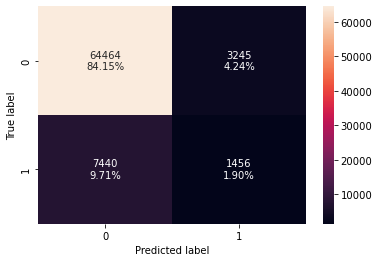

<IPython.core.display.Javascript object>

In [169]:
# Calculating different metrics
xgb_tuned_model_train_perf = model_performance_classification_sklearn(
    xgb_tuned, X_train_over, y_train_over
)
print("Training performance:\n", xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf = model_performance_classification_sklearn(
    xgb_tuned, X_test, y_test
)
print("Testing performance:\n", xgb_tuned_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned, X_test, y_test)